In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df=df.rename(columns=str.lower)
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [4]:
df.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [5]:
imp_reqd=['gender','married','dependents','self_employed','loanamount','loan_amount_term','credit_history']

In [6]:
df['gender'].value_counts()

Male      489
Female    112
Name: gender, dtype: int64

In [7]:
df['married'].value_counts()

Yes    398
No     213
Name: married, dtype: int64

In [8]:
df['credit_history'].value_counts()

1.0    475
0.0     89
Name: credit_history, dtype: int64

In [9]:
df['property_area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: property_area, dtype: int64

In [10]:
df['dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: dependents, dtype: int64

In [11]:
df['loan_amount_term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: loan_amount_term, dtype: int64

In [12]:
cat_cols=['gender','married','education','self_employed','property_area','loan_status','dependents','loan_amount_term']

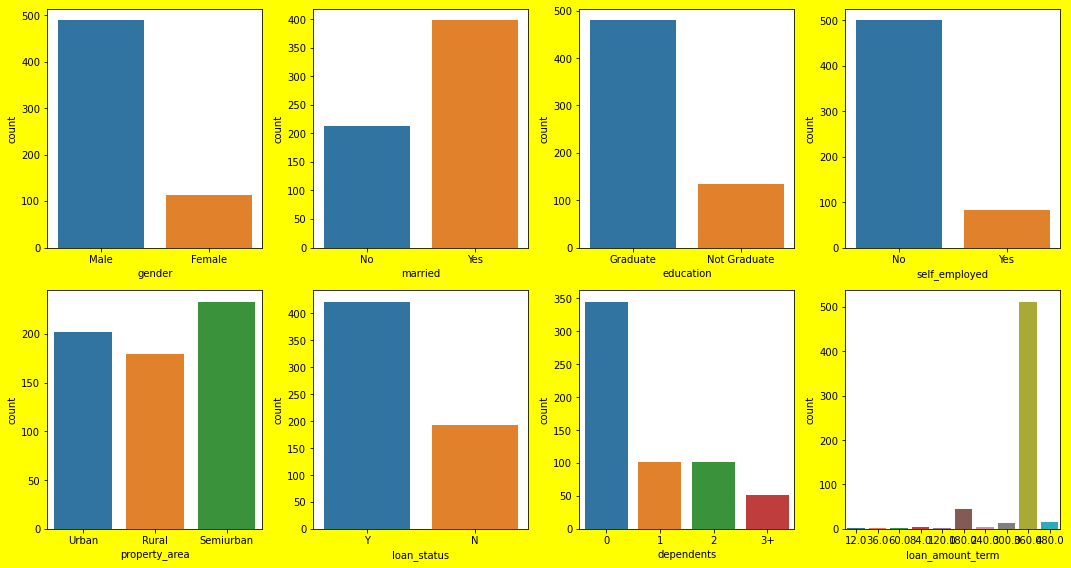

In [13]:
pltno=1
plt.figure(figsize=(15,8),facecolor='yellow')
for i in cat_cols:
    plt.subplot(2,4,pltno)
    sns.countplot(df[i])
    plt.xlabel(i)
    pltno+=1
plt.tight_layout()

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
for i in imp_reqd:
    if i in cat_cols:
        si1=SimpleImputer(strategy='most_frequent')
        df[i]=si1.fit_transform(df[[i]])
    else:
        si2=SimpleImputer(strategy='mean')
        df[i]=si2.fit_transform(df[[i]])
df.isna().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [16]:
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[[i]])
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,8,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,8,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,8,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,8,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,8,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,5,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,8,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,8,1.0,2,1


In [18]:
df['loan_id'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: loan_id, Length: 614, dtype: int64

In [19]:
#so, this is only an id column.. so, no more required. hence, going to delete this.

In [20]:
df=df.drop('loan_id',axis=1)
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,8,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,8,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,8,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,8,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,8,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,5,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,8,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,8,1.0,2,1


In [21]:
df.isna().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [22]:
# coapplicant income column has zero (0) values for many records.. it is justified as there may be chances that if some applicant's coapplicant is not doing job anywhere or she is a house wife.. so, we should leave it as it is..

In [23]:
# let's check skewness..

In [24]:
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,8,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,8,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,8,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,8,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,8,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,5,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,8,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,8,1.0,2,1


In [25]:
cat_cols.append('credit_history')
cat_cols.append('property_area')
cat_cols

['gender',
 'married',
 'education',
 'self_employed',
 'property_area',
 'loan_status',
 'dependents',
 'loan_amount_term',
 'credit_history',
 'property_area']

In [26]:
cont_cols=['applicantincome','coapplicantincome','loanamount']

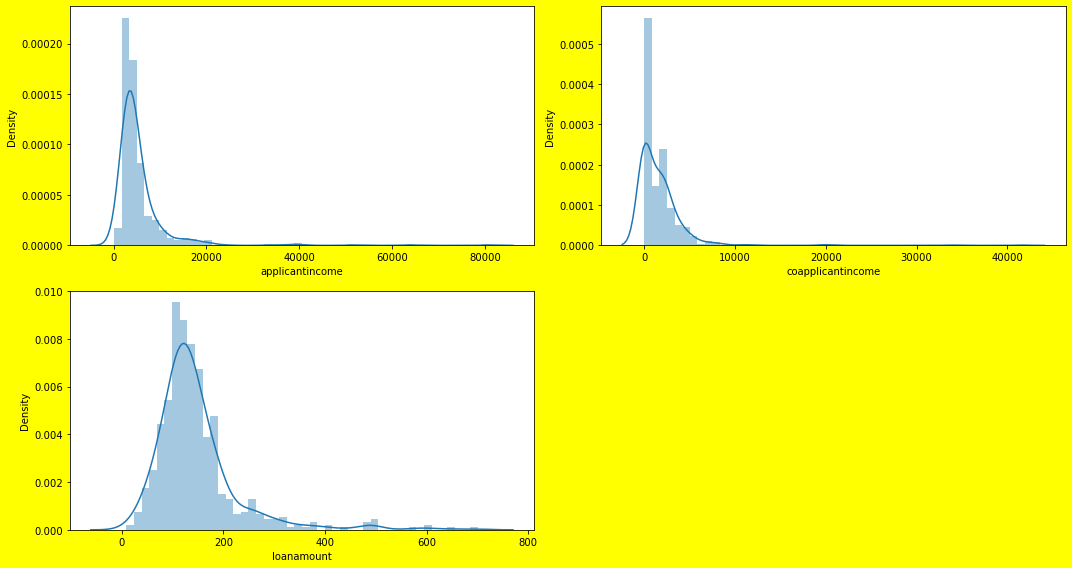

In [27]:
pltno=1
plt.figure(figsize=(15,8),facecolor='yellow')
for i in cont_cols:
    plt.subplot(2,2,pltno)
    sns.distplot(df[i])
    plt.xlabel(i)
    pltno+=1
plt.tight_layout()

In [28]:
#most skewness is observed in almost all of the continuous columns..

In [29]:
#let's quantify this..

In [30]:
df.skew()

gender              -1.648795
married             -0.644850
dependents           1.015551
education            1.367622
self_employed        2.159796
applicantincome      6.539513
coapplicantincome    7.491531
loanamount           2.726601
loan_amount_term    -3.316702
credit_history      -1.963600
property_area       -0.066196
loan_status         -0.809998
dtype: float64

In [31]:
#all the three continuous columns have skewness.

In [32]:
#let's check for outliers..

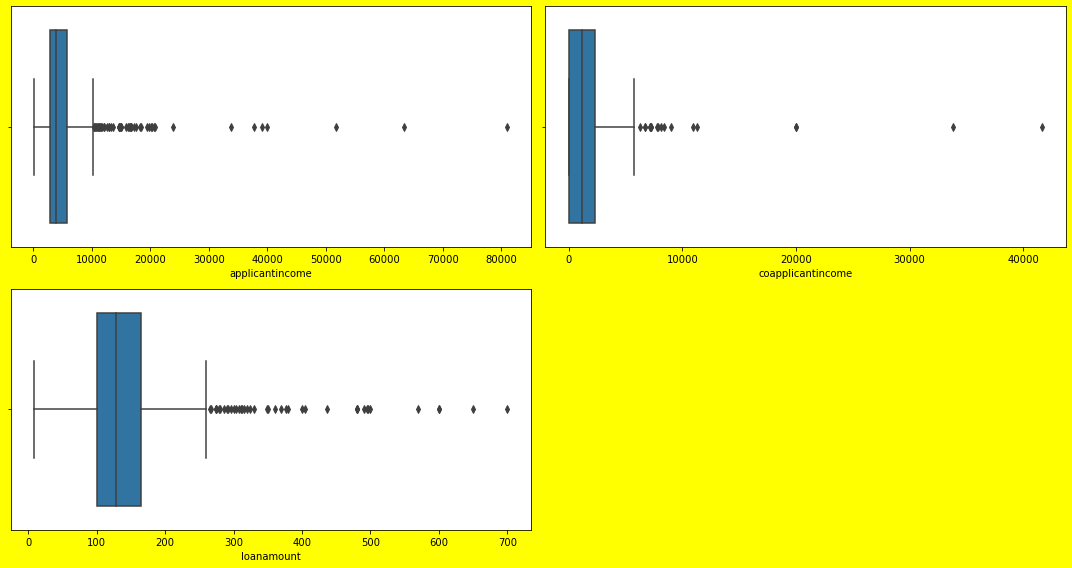

In [33]:
pltno=1
plt.figure(figsize=(15,8),facecolor='yellow')
for i in cont_cols:
    plt.subplot(2,2,pltno)
    sns.boxplot(df[i])
    plt.xlabel(i)
    pltno+=1
plt.tight_layout()

In [34]:
from scipy.stats import zscore
((np.abs(zscore(df)))>3).any()

gender               False
married              False
dependents           False
education            False
self_employed        False
applicantincome       True
coapplicantincome     True
loanamount            True
loan_amount_term      True
credit_history       False
property_area        False
loan_status          False
dtype: bool

In [35]:
ind=[]
for i in cont_cols:
    ind=np.where((np.abs(zscore(df[i])))>3)
ind

(array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
        561, 604], dtype=int64),)

In [36]:
df1=df
df1=df1.drop(df1.index[ind])
df1

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,8,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,8,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,8,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,8,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,8,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,5,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,8,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,8,1.0,2,1


In [37]:
df=df.drop(df.index[ind])
df.reset_index(drop=True,inplace=True)
((np.abs(zscore(df)))>3).all()

gender               False
married              False
dependents           False
education            False
self_employed        False
applicantincome      False
coapplicantincome    False
loanamount           False
loan_amount_term     False
credit_history       False
property_area        False
loan_status          False
dtype: bool

In [38]:
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,8,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,8,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,8,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,8,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
594,0,0,0,0,0,2900,0.0,71.000000,8,1.0,0,1
595,1,1,3,0,0,4106,0.0,40.000000,5,1.0,0,1
596,1,1,1,0,0,8072,240.0,253.000000,8,1.0,2,1
597,1,1,2,0,0,7583,0.0,187.000000,8,1.0,2,1


In [39]:
#let's check for imbalancing..

In [40]:
df['loan_status'].value_counts()

1    411
0    188
Name: loan_status, dtype: int64

In [41]:
# so,it's completely imbalancing case. Smote will be used for this.

In [42]:
df.skew()

gender              -1.638242
married             -0.627853
dependents           1.025136
education            1.329348
self_employed        2.203065
applicantincome      8.076337
coapplicantincome    7.753780
loanamount           1.206341
loan_amount_term    -3.355765
credit_history      -1.961391
property_area       -0.064943
loan_status         -0.804257
dtype: float64

In [43]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [44]:
for i in cont_cols:
    df[i]=pt.fit_transform(df[[i]])
df.skew()

gender              -1.638242
married             -0.627853
dependents           1.025136
education            1.329348
self_employed        2.203065
applicantincome     -0.037284
coapplicantincome   -0.169875
loanamount           0.059002
loan_amount_term    -3.355765
credit_history      -1.961391
property_area       -0.064943
loan_status         -0.804257
dtype: float64

In [45]:
# hence, all continuous columns have skewness in the allowed range..

In [46]:
# let's check for correlation..

In [47]:
df.corr()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
gender,1.000000,0.374426,0.176227,0.047674,0.004149,0.083138,0.221254,0.151682,-0.063615,0.016868,-0.027167,0.023003
married,0.374426,1.000000,0.330096,0.016609,0.003593,0.000981,0.317091,0.176908,-0.077037,0.008955,0.003168,0.091154
dependents,0.176227,0.330096,1.000000,0.061306,0.052310,0.108267,-0.002139,0.161349,-0.090422,-0.021799,0.001698,0.008648
education,0.047674,0.016609,0.061306,1.000000,-0.005346,-0.163638,0.031976,-0.137329,-0.078418,-0.078976,-0.065758,-0.085837
self_employed,0.004149,0.003593,0.052310,-0.005346,1.000000,0.190580,-0.087430,0.098281,-0.041232,-0.008959,-0.024354,-0.016240
applicantincome,0.083138,0.000981,0.108267,-0.163638,0.190580,1.000000,-0.362281,0.416909,-0.003509,0.016641,-0.045233,0.000554
coapplicantincome,0.221254,0.317091,-0.002139,0.031976,-0.087430,-0.362281,1.000000,0.187927,0.009106,0.008137,-0.050367,0.067126
loanamount,0.151682,0.176908,0.161349,-0.137329,0.098281,0.416909,0.187927,1.000000,0.089647,-0.018753,-0.101949,-0.062267
loan_amount_term,-0.063615,-0.077037,-0.090422,-0.078418,-0.041232,-0.003509,0.009106,0.089647,1.000000,-0.008385,-0.083629,-0.000466
credit_history,0.016868,0.008955,-0.021799,-0.078976,-0.008959,0.016641,0.008137,-0.018753,-0.008385,1.000000,-0.000956,0.548980


<AxesSubplot:>

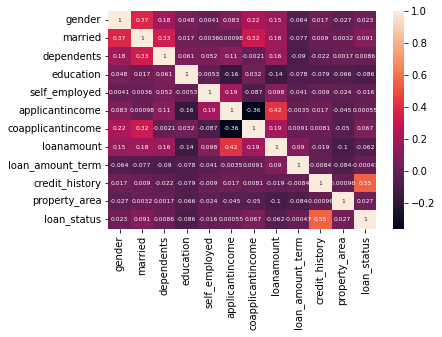

In [48]:
sns.heatmap(df.corr(),annot=True,annot_kws={'size':6})

In [49]:
# credit_history column is highly correlated with the target variable...

In [50]:
# let's check for multicollinearity..

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
def vif_check(df):
    x=df.drop('loan_status',axis=1)
    vif = pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
    vif['features'] = x.columns
    print(vif)

In [53]:
vif_check(df)

          vif           features
0    6.231371             gender
1    3.908931            married
2    1.801701         dependents
3    1.347144          education
4    1.189891      self_employed
5    1.690796    applicantincome
6    1.556548  coapplicantincome
7    1.494323         loanamount
8   10.510372   loan_amount_term
9    6.240739     credit_history
10   2.656097      property_area


In [54]:
# loan_amount_term has the highest vif values >5. so, going to delete this..

In [55]:
df=df.drop('loan_amount_term',axis=1)
vif_check(df)

        vif           features
0  5.187330             gender
1  3.839225            married
2  1.801700         dependents
3  1.326845          education
4  1.182173      self_employed
5  1.671376    applicantincome
6  1.517734  coapplicantincome
7  1.485983         loanamount
8  4.056915     credit_history
9  2.435016      property_area


In [56]:
# gender has higher vif >5.. so, going to delete this..

In [57]:
df=df.drop('gender',axis=1)
vif_check(df)

        vif           features
0  3.191754            married
1  1.787915         dependents
2  1.291179          education
3  1.180008      self_employed
4  1.656159    applicantincome
5  1.505497  coapplicantincome
6  1.485591         loanamount
7  3.188982     credit_history
8  2.347527      property_area


In [58]:
# standard scaler is used for scaling..

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
for i in cont_cols:
    df[i]=scaler.fit_transform(df[[i]])
df

,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,credit_history,property_area,loan_status
0,0,0,0,0,0.627549,-1.118182,0.294421,1.0,2,1
1,1,1,0,0,0.223864,0.735988,-0.023806,1.0,0,0
2,1,0,0,1,-0.487511,-1.118182,-1.388061,1.0,2,1
3,1,0,1,0,-0.741848,0.882415,-0.171318,1.0,2,1
4,0,0,0,0,0.669491,-1.118182,0.203702,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
594,0,0,0,0,-0.544982,-1.118182,-1.252994,1.0,0,1
595,1,3,0,0,0.040591,-1.118182,-2.224334,1.0,0,1
596,1,1,0,0,1.154263,0.179972,1.757391,1.0,2,1
597,1,2,0,0,1.052649,-1.118182,0.914111,1.0,2,1


In [61]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [62]:
!pip install scikit-learn==0.21.0

ERROR: Could not find a version that satisfies the requirement scikit-learn==0.21.0 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0b1, 0.15.0b2, 0.15.0, 0.15.1, 0.15.2, 0.16b1, 0.16.0, 0.16.1, 0.17b1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19b2, 0.19.0, 0.19.1, 0.19.2, 0.20rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21rc2, 0.21.1, 0.21.2, 0.21.3, 0.22rc2.post1, 0.22rc3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0rc1, 0.23.0, 0.23.1, 0.23.2, 0.24.dev0, 0.24.0rc1, 0.24.0, 0.24.1, 0.24.2, 1.0rc1, 1.0rc2, 1.0, 1.0.1, 1.0.2, 1.1.0rc1, 1.1.0, 1.1.1)
ERROR: No matching distribution found for scikit-learn==0.21.0


In [63]:
from imblearn.over_sampling import SMOTE

In [72]:
sm=SMOTE(0.8)
x_new,y_new=sm.fit_resample(x,y)

In [73]:
x_new

,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,credit_history,property_area
0,0,0,0,0,0.627549,-1.118182,0.294421,1.000000,2
1,1,1,0,0,0.223864,0.735988,-0.023806,1.000000,0
2,1,0,0,1,-0.487511,-1.118182,-1.388061,1.000000,2
3,1,0,1,0,-0.741848,0.882415,-0.171318,1.000000,2
4,0,0,0,0,0.669491,-1.118182,0.203702,1.000000,2
...,...,...,...,...,...,...,...,...,...
734,1,2,0,0,-0.417161,0.818961,0.531521,0.765407,2
735,1,0,0,0,0.636252,0.888053,0.804070,0.902128,0
736,0,0,0,0,1.218581,-1.118182,1.121796,1.000000,0
737,0,0,0,0,0.597381,1.094700,1.924068,1.000000,0


In [74]:
y_new

0      1
1      0
2      1
3      1
4      1
      ..
734    0
735    0
736    0
737    0
738    0
Name: loan_status, Length: 739, dtype: int32

In [75]:
y_new.value_counts()

1    411
0    328
Name: loan_status, dtype: int64

In [68]:
#it's a classification problem..

In [77]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,plot_roc_curve

In [76]:
def algo_class_check (x,y,algo):
    max_acc=0
    max_i=0
    for i in range(100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = i)
        algo.fit(x_train,y_train)
        y_pred = algo.predict(x_test)
        acc= accuracy_score(y_test,y_pred)
        if acc> max_acc:
            max_acc=acc
            max_i = i
            i+=1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = max_i)
    algo.fit(x_train,y_train)
    y_pred = algo.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    cvs=cross_val_score(algo,x_train,y_train,cv=7,scoring='accuracy')
    ac=cvs.mean()
    print(f'''for algo {algo}, the maximum accuracy is {max_acc} ,\n classification report is : \n {classification_report(y_test,y_pred)} ,
    \n roc_auc_score is : {roc_auc_score(y_test,y_pred)} \n roc curve is :{plot_roc_curve(algo,x,y)} \n at random_state{max_i} \n and cross validation score is {ac}''') 
 

In [78]:
lc=LogisticRegression()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

for algo LogisticRegression(), the maximum accuracy is 0.8324324324324325 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.90      0.69      0.78        81
           1       0.80      0.94      0.86       104

    accuracy                           0.83       185
   macro avg       0.85      0.82      0.82       185
weighted avg       0.84      0.83      0.83       185
 ,
    
 roc_auc_score is : 0.8168328584995251 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E3BE590A00> 
 at random_state38 
 and cross validation score is 0.734764918625678


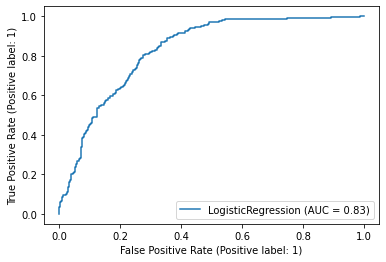

In [79]:
algo_class_check(x_new,y_new,lc)

for algo KNeighborsClassifier(), the maximum accuracy is 0.8 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.84      0.71      0.77        87
           1       0.77      0.88      0.82        98

    accuracy                           0.80       185
   macro avg       0.81      0.80      0.80       185
weighted avg       0.80      0.80      0.80       185
 ,
    
 roc_auc_score is : 0.7950973492845415 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E3BF0CEE50> 
 at random_state12 
 and cross validation score is 0.7021021699819168


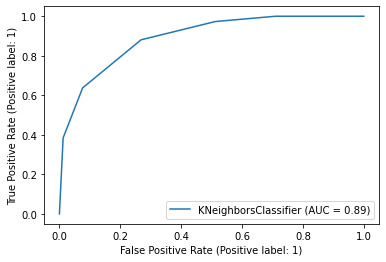

In [80]:
algo_class_check(x_new,y_new,knc)

for algo RandomForestClassifier(), the maximum accuracy is 0.8486486486486486 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        84
           1       0.83      0.89      0.86       101

    accuracy                           0.84       185
   macro avg       0.85      0.84      0.84       185
weighted avg       0.84      0.84      0.84       185
 ,
    
 roc_auc_score is : 0.8384016973125884 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E3BF1A2220> 
 at random_state21 
 and cross validation score is 0.7742992766726944


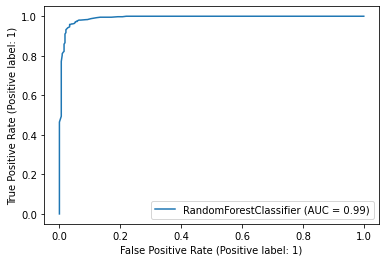

In [81]:
algo_class_check(x_new,y_new,rfc)

for algo AdaBoostClassifier(), the maximum accuracy is 0.827027027027027 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.78      0.73      0.75        67
           1       0.85      0.88      0.87       118

    accuracy                           0.83       185
   macro avg       0.82      0.81      0.81       185
weighted avg       0.83      0.83      0.83       185
 ,
    
 roc_auc_score is : 0.8063496078927397 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E3B9BB5FA0> 
 at random_state28 
 and cross validation score is 0.749118444846293


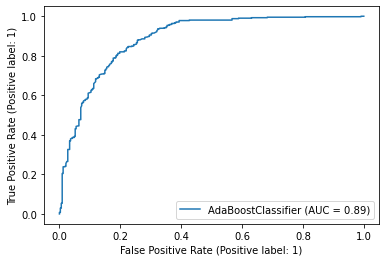

In [82]:
algo_class_check(x_new,y_new,abc)

for algo DecisionTreeClassifier(), the maximum accuracy is 0.8054054054054054 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.74      0.79      0.76        76
           1       0.85      0.81      0.83       109

    accuracy                           0.80       185
   macro avg       0.79      0.80      0.80       185
weighted avg       0.80      0.80      0.80       185
 ,
    
 roc_auc_score is : 0.7984065668759054 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E3BF0D95E0> 
 at random_state40 
 and cross validation score is 0.7165009041591321


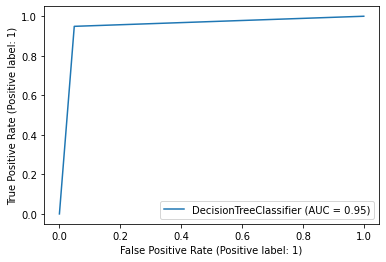

In [83]:
algo_class_check(x_new,y_new,dtc)

for algo SVC(), the maximum accuracy is 0.8324324324324325 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.91      0.60      0.72        67
           1       0.81      0.97      0.88       118

    accuracy                           0.83       185
   macro avg       0.86      0.78      0.80       185
weighted avg       0.84      0.83      0.82       185
 ,
    
 roc_auc_score is : 0.7815583101441942 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E3B9B921F0> 
 at random_state28 
 and cross validation score is 0.7346745027124774


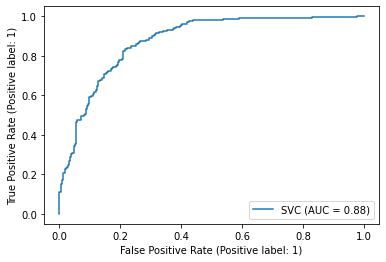

In [84]:
algo_class_check(x_new,y_new,svc)

In [85]:
# rfc has maximum accuracy as well as maximum cross_val_score, at random_state 21.. so, i m going to finalize this..

for RandomForestClassifier algo, the accuracy is 0.8432432432432433 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.88      0.76      0.82        84
           1       0.82      0.91      0.86       101

    accuracy                           0.84       185
   macro avg       0.85      0.84      0.84       185
weighted avg       0.85      0.84      0.84       185
 ,
    
 roc_auc_score is : 0.8363979255068363 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E3BF2D4550> 
 and cross validation score is 0.781487341772152


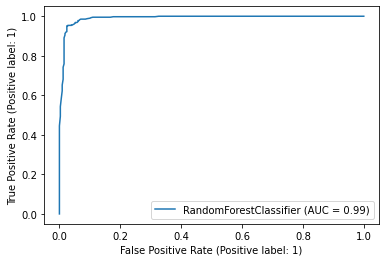

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.25,random_state = 21)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
acc= accuracy_score(y_test,y_pred)
cvs=cross_val_score(rfc,x_train,y_train,cv=7,scoring='accuracy')
ac=cvs.mean()
print(f'''for RandomForestClassifier algo, the accuracy is {acc} ,\n classification report is : \n {classification_report(y_test,y_pred)} ,
    \n roc_auc_score is : {roc_auc_score(y_test,y_pred)} \n roc curve is :{plot_roc_curve(rfc,x_new,y_new)} \n and cross validation score is {ac}''') 
 

In [88]:
# let's hypertune..

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
params={'criterion':['gini','impurity','log_loss'],'max_depth':[7,9,11,12],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2],'max_features':['sqrt','log2'],'min_impurity_decrease':[0.0,0.1,0.2,0.3]}
grid = GridSearchCV(rfc,param_grid=params,cv=5,n_jobs=-1)
grid.fit(x_new,y_new)
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

for RandomForestClassifier algo with hypertuned parameters, 
 the accuracy is 0.8702702702702703 ,
 
classification report is : 
               precision    recall  f1-score   support

           0       0.93      0.77      0.84        84
           1       0.83      0.95      0.89       101

    accuracy                           0.87       185
   macro avg       0.88      0.86      0.87       185
weighted avg       0.88      0.87      0.87       185
 ,
    

 roc_auc_score is : 0.8621522866572371 

 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E3BF414A30> 
 and cross validation score is 0.7797242314647378


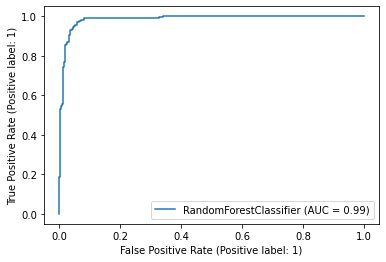

In [92]:
rfc1=RandomForestClassifier(criterion='log_loss',max_depth=12,min_samples_split=3,min_samples_leaf=1,max_features='sqrt',min_impurity_decrease=0.0)
rfc1.fit(x_train,y_train)
y_pred = rfc1.predict(x_test)
acc= accuracy_score(y_test,y_pred)
cvs=cross_val_score(rfc1,x_train,y_train,cv=7,scoring='accuracy')
ac=cvs.mean()
print(f'''for RandomForestClassifier algo with hypertuned parameters, \n the accuracy is {acc} ,\n \nclassification report is : \n {classification_report(y_test,y_pred)} ,
    \n\n roc_auc_score is : {roc_auc_score(y_test,y_pred)} \n\n roc curve is :{plot_roc_curve(rfc1,x_new,y_new)} \n and cross validation score is {ac}''') 
 

In [93]:
# there's a significant improvement..

In [94]:
# let's save this model..

In [95]:
import pickle
filename = 'Loan_Application_Status_Evaluation_Project'
pickle.dump(rfc1,open(filename,'wb'))

In [96]:
#CONCLUSION
# 1).HERE, I FOUND CLASS OF TARGET Loan_Status. IT HAS TWO CLASSES ONLY- Yes or No (i.e. 0 or 1).
# 2).IT'S A CLASSIFICATION PROBLEM WITH IMBALANCING PROBLEM OF TARGET VARIABLE.
# 3).FIRSTLY, I CHECKED ALL OF THE FEATURES AS IT HAS 13 FEATURES SO CLASSIFIED THEM
# INTO CONTINUOUS AND CATEGORICAL COLUMNS. ALSO, THERE WERE NAN VALUES IN SOME OF THE COLUMNS 
# SO IMPUTED THEM BY USING SIMPLE IMPUTER.
# 4).ALSO, USED LABEL ENCODER TO ENCODE CATEGORICAL COLUMNS.
# 5).ALSO, THERE WAS 1 ID COLUMN WHICH HAD NOTHING TO DO WITH MY MODEL. 
# SO, THAT WAS OF NO USE. HENCE, DELETED THAT FEATURE.
# 6).THEN I REMOVED OUTLIERS BASED ON ZSCORES.
# 7).THEN SKEWNESS REMOVED USING POWER TRANFORMER WITH YEO-JOHNSON METHOD
# 8).THEN DELETED SOME FEATURES BASED ON VIF VALUES AND HENCE, REMOVED MULTICOLLINEARITY.
# 9).THEN DONE SCALING ON THE X BY USING STANDARD SCALER.
# 10).THEN USED SMOTE WITH 0.8 AND HENCE, IMBALANCING OF TARGET VARIABLE WAS TACKLED.
# 11).I CHECKED MY MODEL WITH DIFFERENT ALGOS AND CAME TO THE CONCLUSION THAT
#  ACC. TO MY MODEL, RANDOM FOREST CLASSIFIER ALGO IS THE BEST ALGO.
# 12).THE ACCURACY IN TERMS OF ACCURACY_SCORE I GOT IS IN THE RANGE OF 84% ALONG WITH
# ROC_AUC_SCORE TO BE 83% AND 78% CROSS_VAL_SCORE.
# 13).ON CHECKING BY GRIDSEARCHCV, I FOUND THAT RFC IMPROVED MY MODEL WITH INCREASE IN ACCURACY TO UPTO 87%
# WITH ROC_AUC_SCORE 86% AND ALSO CROSS_VAL_SCORE TO UPTO 77.9%. 
# 14). HENCE, I FINALIZED MY MODEL WITH RANDOMFORESTCLASSIFIER WITH ITS HYPERTUNED PARAMETERS GIVEN BY 
# GRID SEARCH CV.
# 15).I ALSO PRINTED CLASSIFICATION REPORT FOR EACH ALGO I TRIED.
# 16). I ALSO PLOTTED ROC_CURVE FOR ALL ALGOS.
# 17). THEN SAVED THE MODEL IN PICKLE BY NAME 'Loan_Application_Status_Evaluation_Project'.